In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from google.colab import drive
drive.mount('/content/gdrive/')



In [ ]:
my_local_drive='/content/gdrive/My Drive/MachineLearning/Dataset'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

training_set = pd.read_csv('HAI817_Projet_train.csv')
testing_set = pd.read_csv('HAI817_Projet_test.csv')


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Visualisation

In [ ]:
training_set = pd.read_csv('HAI817_Projet_train.csv')
testing_set = pd.read_csv('HAI817_Projet_test.csv')
display(training_set.head())

,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,mixture
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,mixture
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,false
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,false


valeurs nulles

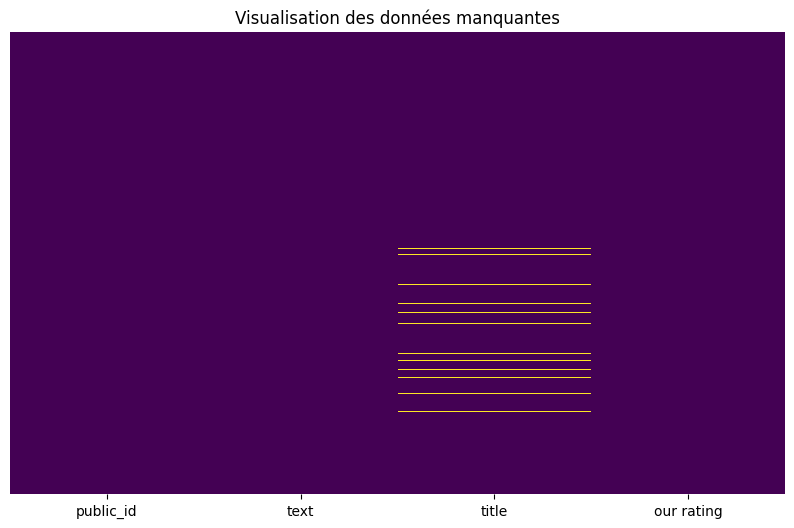

In [ ]:
# Calculer les valeurs manquantes
vals_manquantes = training_set.isnull()

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vals_manquantes, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

Prétraitement

Enlever les majuscules


In [ ]:
def lower_case(text):
  return text.map(lambda x: x if type(x)!=str else x.lower())


training_set['title'] = lower_case(training_set['title'])
testing_set['title'] = lower_case(testing_set['title'])

training_set['text'] = lower_case(training_set['text'])
testing_set['text'] = lower_case(testing_set['text'])def tokenize(text):
    return text.map(lambda x: x.split() if type(x) == str else x)

display(training_set.head())

,public_id,text,title,our rating
0,5a228e0e,distracted driving causes more deaths in canad...,"you can be fined $1,500 if your passenger is u...",false
1,30c605a1,missouri politicians have made statements afte...,missouri lawmakers condemn las vegas shooting,mixture
2,c3dea290,home alone 2: lost in new york is full of viol...,cbc cuts donald trump's 'home alone 2' cameo o...,mixture
3,f14e8eb6,but things took a turn for the worse when riot...,obama’s daughters caught on camera burning us ...,false
4,faf024d6,it’s no secret that epstein and schiff share a...,leaked visitor logs reveal schiff’s 78 visits ...,false


Tokenization

In [ ]:
def tokenize(text):
    return text.map(lambda x: x.split() if type(x) == str else x)

training_set['text'] = tokenize(training_set['text'])
testing_set['text'] = tokenize(testing_set['text'])

training_set['title'] = tokenize(training_set['title'])
testing_set['title'] = tokenize(testing_set['title'])

display(training_set.head())

,public_id,text,title,our rating
0,5a228e0e,"[distracted, driving, causes, more, deaths, in...","[you, can, be, fined, $1,500, if, your, passen...",false
1,30c605a1,"[missouri, politicians, have, made, statements...","[missouri, lawmakers, condemn, las, vegas, sho...",mixture
2,c3dea290,"[home, alone, 2:, lost, in, new, york, is, ful...","[cbc, cuts, donald, trump's, 'home, alone, 2',...",mixture
3,f14e8eb6,"[but, things, took, a, turn, for, the, worse, ...","[obama’s, daughters, caught, on, camera, burni...",false
4,faf024d6,"[it’s, no, secret, that, epstein, and, schiff,...","[leaked, visitor, logs, reveal, schiff’s, 78, ...",false


Enlever les stop words

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

training_set['text'] = training_set['text'].apply(remove_stopwords)
testing_set['text'] = testing_set['text'].apply(remove_stopwords)

training_set['title'] = training_set['title'].apply(remove_stopwords)
testing_set['title'] = testing_set['title'].apply(remove_stopwords)



TypeError: 'float' object is not iterable

Remettre en chaine de charactère si besoin

In [ ]:
def recombine_tokens(tokens):
    return ' '.join(tokens)

training_set['text'] = training_set['text'].apply(recombine_tokens)
testing_set['text'] = testing_set['text'].apply(recombine_tokens)

training_set['title'] = training_set['title'].apply(recombine_tokens)
testing_set['title'] = testing_set['title'].apply(recombine_tokens)


TypeError: can only join an iterable

Traiter les noms


1.   remove si < 5%
2.   if you want to try including those samples, you should fill out the empty cells(you can eever try both cases). Here are some solutions available for extracting the keywords/titles of  given text:
  
  ntk libraries
  using transformer models pretrained for summerizatoin //par recommander
  news paper or beautifulsoup librairies (if you have the text's URL)


Methode pour demander au classifieur les features importantes:
  SVD : reduire les vecteurs
  t_SNE: visualisation
  UMAP : fais les deux

